In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

In [2]:
D = pd.read_csv('dengue.csv').dropna()

In [3]:
X = np.array(D[['humid','temp','h10pix','trees','Xmin','Ymin']])
for i in range(len(X[0])):
    X[:,i] = ( X[:,i] - np.mean(X[:,i]) )/np.std(X[:,i])

In [4]:
def W(X,clus):
    n = np.max(clus)+1
    D_log = np.zeros(n)
    for k in range(n):
        Diff = Diff1 = 0
        C = np.sum(np.where(clus==k,1.0,0.0))
        x = X[clus == k]
        D = np.zeros_like(x)
        for i in range(len(x[0])):
            b = np.max(x[:,i])
            a = np.min(x[:,i])
            D[:,i] = (b - a) * np.random.random(len(x)) + a

        for p in range(len(x[0])):
            for i in range(len(x)):
                    Diff += 0.5 * np.sum((x[i,p] - x[:,p])**2.0)
                    Diff1 += 0.5 * np.sum((D[i,p] - D[:,p])**2.0)
        D_log[k] = np.log((1.0/C)*Diff) - np.log( (1.0/C) * Diff1)
    return np.sum(D_log)

In [5]:
N = 21
gap = np.zeros(N)
for i in range(1,N):
    kmeans = KMeans(n_clusters=i).fit_predict(X)
    gap[i] = W(X,kmeans)

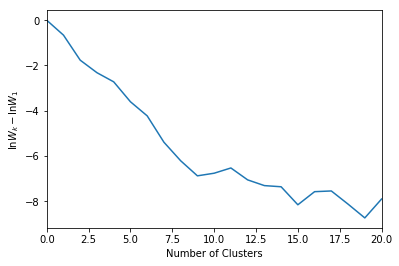

In [6]:
plt.plot(np.arange(N),gap)
plt.xlim([0,20])
plt.xlabel('Number of Clusters')
plt.ylabel('$\ln W_k - \ln W_1$')
plt.show()

Como se puede evidenciar en la gráfica el numero de Clusters optimo es el minimo valor para el cual, el gap es mayor por una desviación estandar del gap del siguiente numero de Clusters, en este caso 11 es el valor optimo

In [7]:
BB = pd.read_csv('BreadBasket_DMS.csv')

In [66]:
X = np.array(BB[['Date','Time','Transaction']])
Y = np.array(BB['Item'])
keys = np.unique(Y)
for i in range(len(X)):
    X[i,1] = (int(X[i,1].split(':')[0]) * 3600) + (int(X[i,1].split(':')[1]) * 60) + (int(X[i,1].split(':')[1]))
    
    X[i,0] = (int(X[i,0].split('-')[0]) * 365) + (int(X[i,0].split('-')[1]) * 31) + (int(X[i,0].split('-')[1]))


for i in range(len(X[0])):
    X[:,i] = ( X[:,i] - np.mean(X[:,i]) )/np.std(X[:,i])
X = X.astype('float64')

In [69]:
EV, V = np.linalg.eig(np.cov(X.T))

In [98]:
print(EV)

[ 1.98169979  0.0260727   0.99236841]


In [72]:
PCA1 = PCA2 = np.zeros(len(X))
for i in range(len(X)):
    PCA1[i] = np.dot(X[i,:],V[:,0])
    PCA2[i] = np.dot(X[i,:],V[:,1])

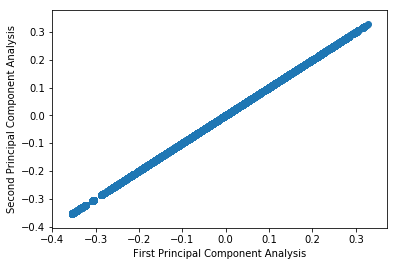

In [73]:
plt.scatter(PCA1,PCA2)
plt.xlabel('First Principal Component Analysis')
plt.ylabel('Second Principal Component Analysis')
plt.show()

In [74]:
N = 21 
gap = np.zeros(N)
for i in range(1,N):
    kmeans = KMeans(n_clusters=i).fit_predict(X)
    gap[i] = W(X,kmeans)

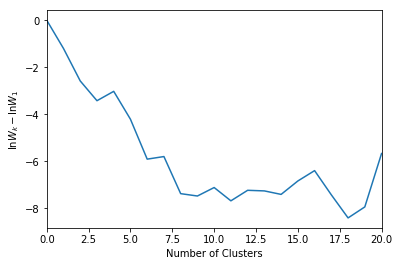

In [75]:
plt.plot(np.arange(N),gap)
plt.xlim([0,20])
plt.xlabel('Number of Clusters')
plt.ylabel('$\ln W_k - \ln W_1$')
plt.show()

Como se puede evidenciar en la grafica el numero de Clusters optimo puede ser 8

In [96]:
kmeans = KMeans(n_clusters=8).fit_predict(X)

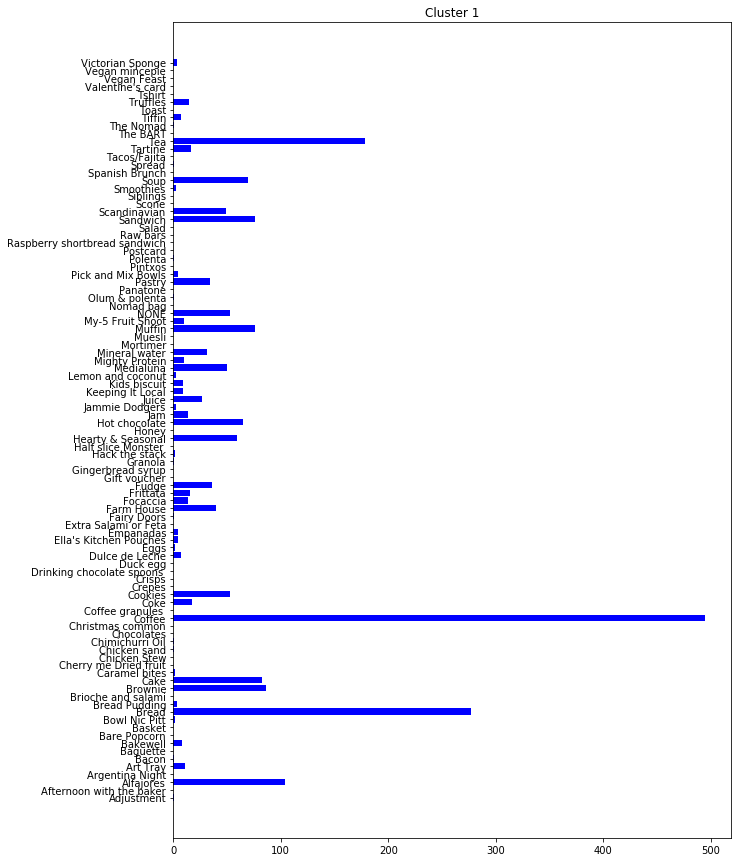

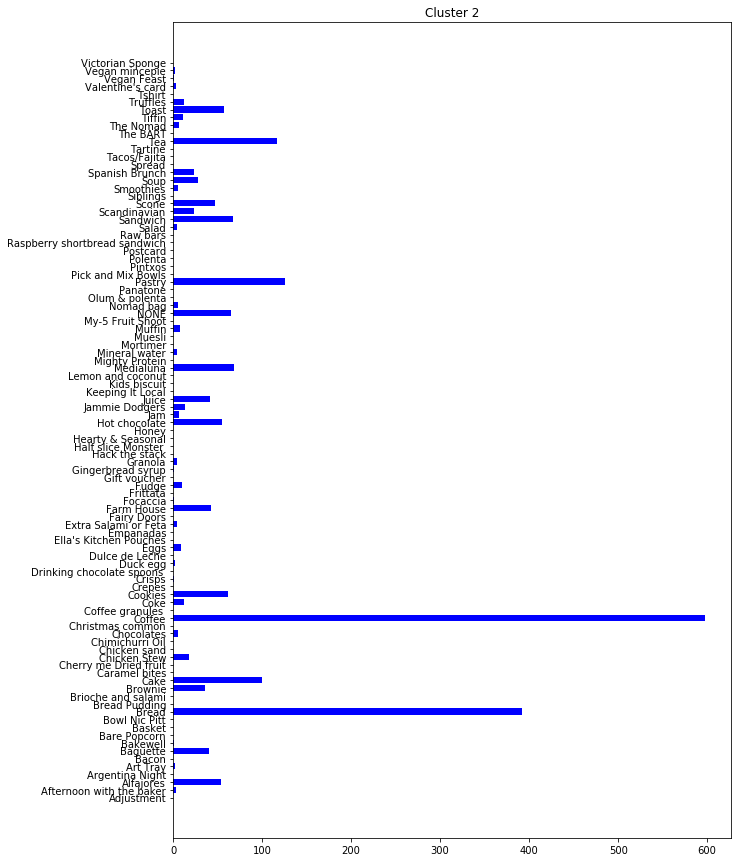

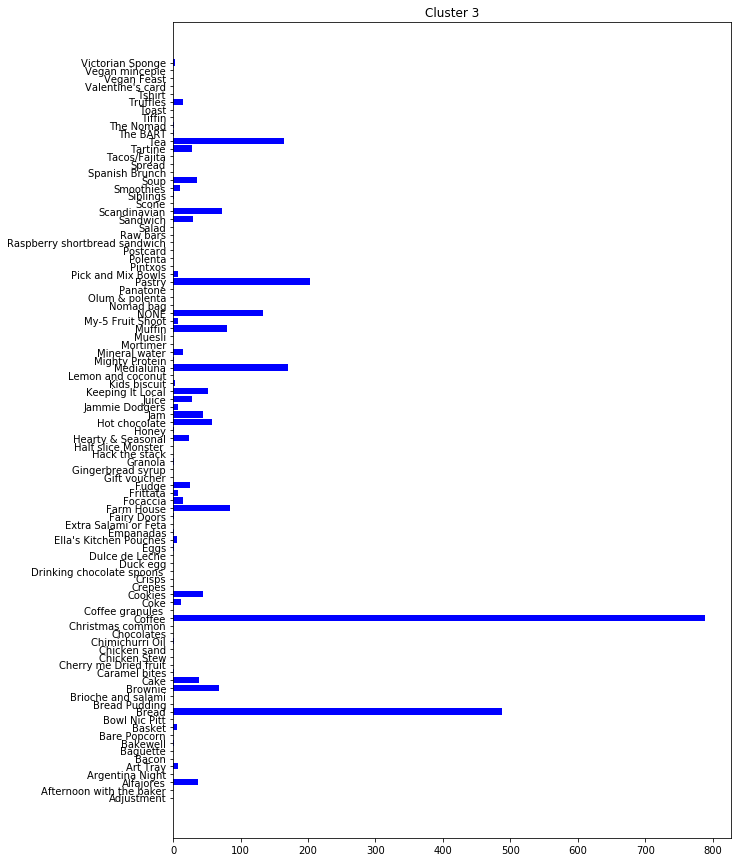

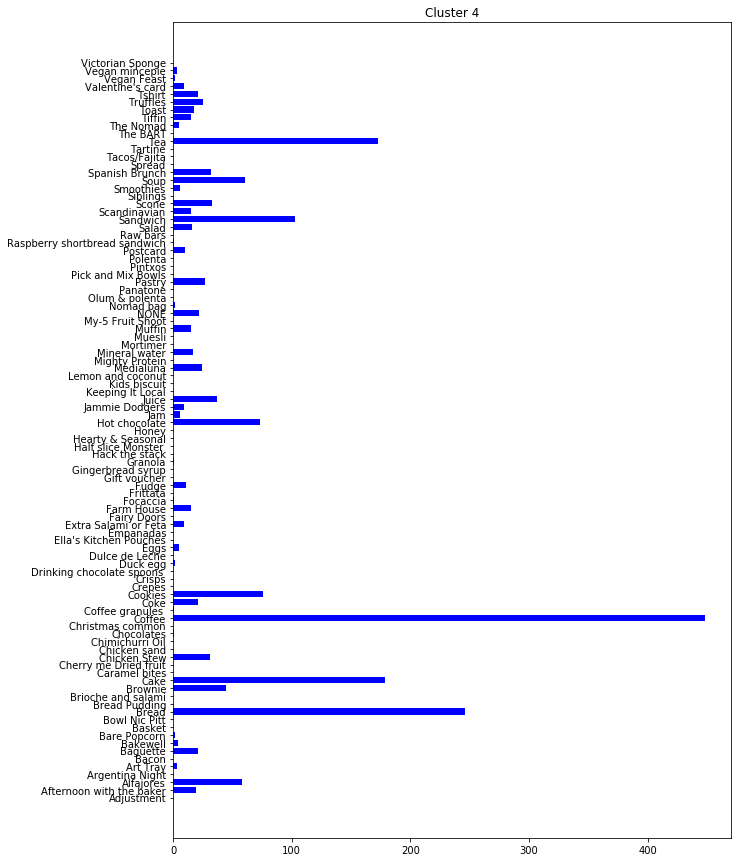

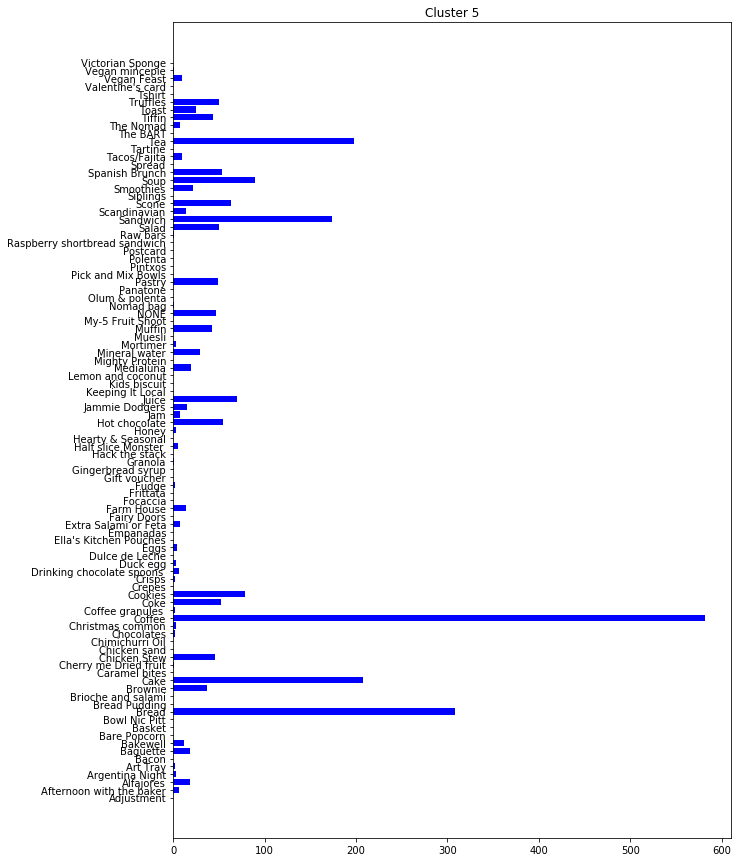

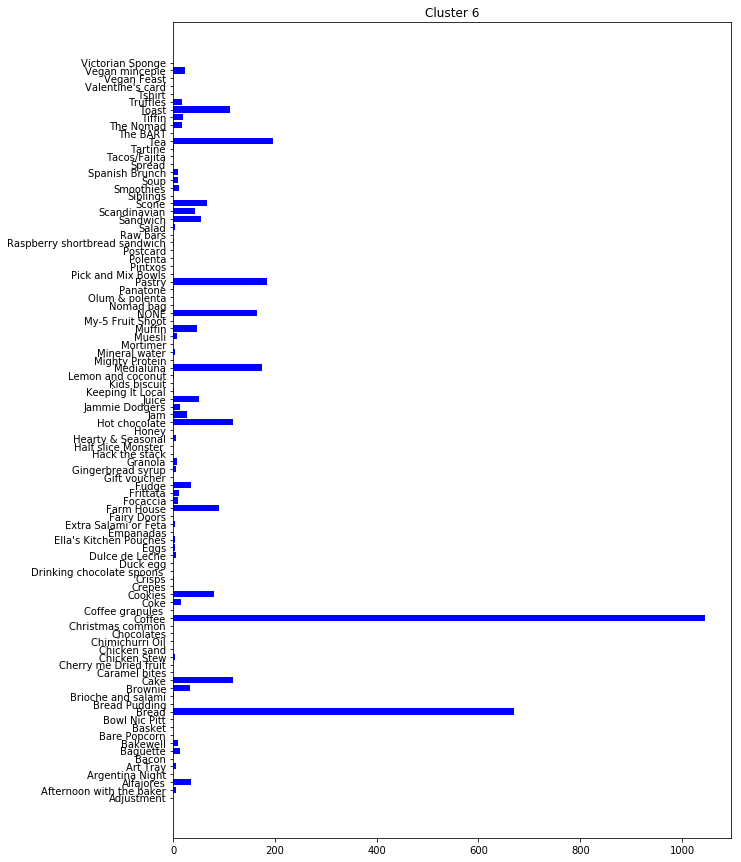

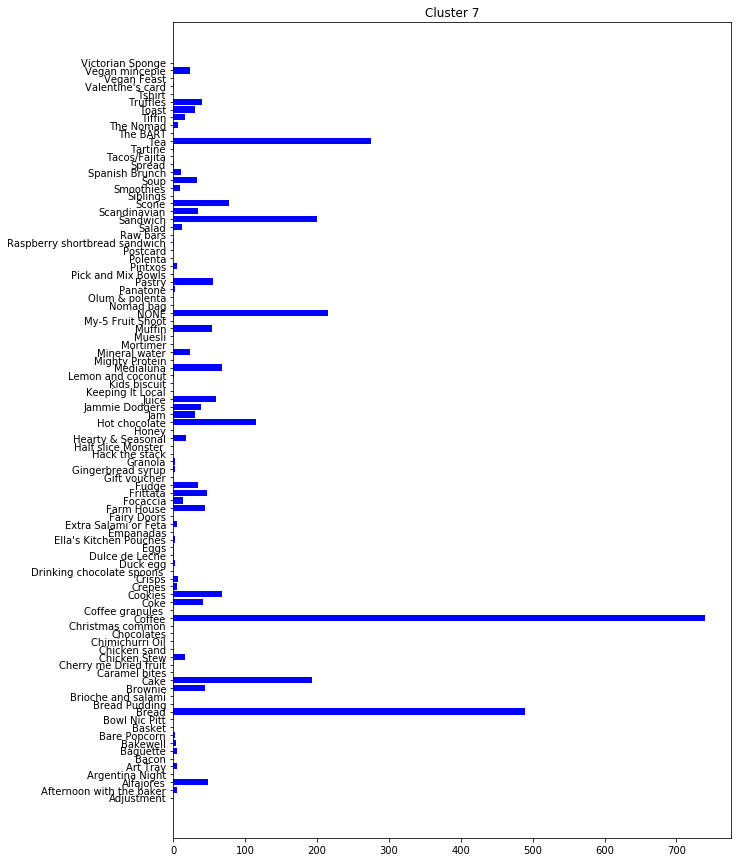

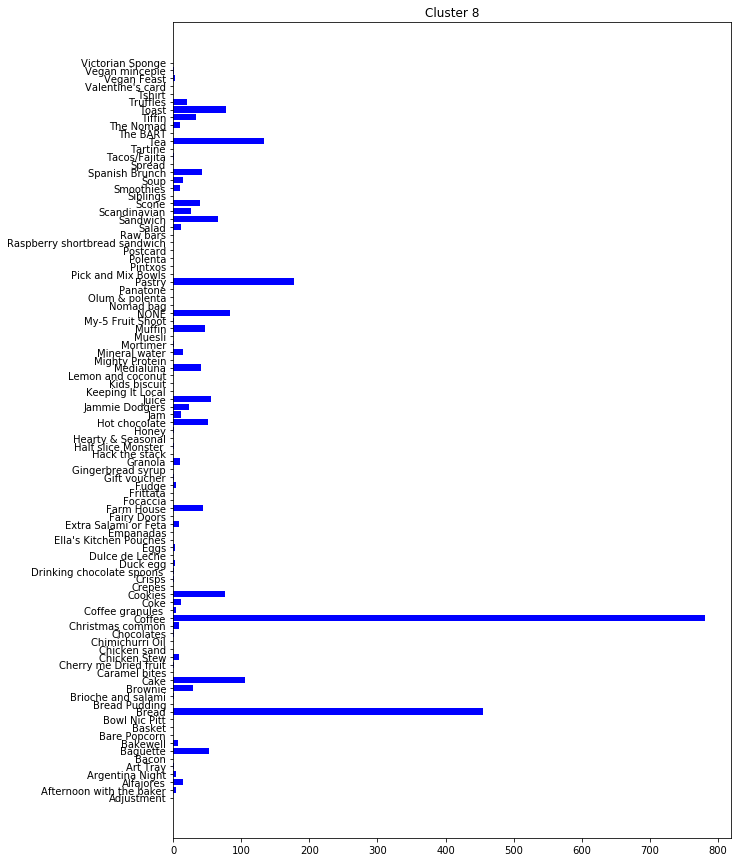

In [97]:
for i in range(8):
    plt.figure(figsize=(10,15))
    x = X[kmeans==i,0]
    y = Y[kmeans==i]
    dat = np.zeros(len(keys))
    for j in range(len(keys)):
        dat[j] = len(x[y==keys[j]])
        
    
    plt.barh(keys, dat, color="blue")
    plt.title('Cluster '+str(i+1))
    plt.show()

Lo anterior, permite evidenicar que el cafe se compra de forma indiscriminada todos los dias junto con pan